# 8회차: CNN을 활용한 패션 아이템 분류 (2) – 데이터 처리 및 전처리

## numpy 활용

In [ ]:
import numpy as np

ary1 = np.array([1, 2, 3])
ary2 = np.array([[1, 2, 3.], [4, 5, 6]])

print(ary1)
print(ary2)

[1 2 3]
[[1. 2. 3.]
 [4. 5. 6.]]


In [ ]:
type(ary1), type(ary2)

(numpy.ndarray, numpy.ndarray)

In [35]:
import numpy as np

ary1 = np.array([1, 2, 3])
ary2 = np.array([[1, 2, 3.], [4, 5, 6]])

print(f'ary1.ndim = {ary1.ndim}, ary1.shape = {ary1.shape}')
print(f'ary1.size = {ary1.size}, ary1.dtype = {ary1.dtype}')
print(f'ary2.ndim = {ary2.ndim}, ary1.shape = {ary2.shape}')
print(f'ary2.size = {ary2.size}, ary1.dtype = {ary2.dtype}')

ary1.ndim = 1, ary1.shape = (3,)
ary1.size = 3, ary1.dtype = int64
ary2.ndim = 2, ary1.shape = (2, 3)
ary2.size = 6, ary1.dtype = float64


In [26]:
import numpy as np

# [0, 1) 사이의 난수
print(np.random.rand())     # 1개
print(np.random.rand(4))    # 1차원 4개
print(np.random.rand(2, 3)) # 2차원, 2행 3열

0.6860941042743315
[0.38775886 0.81542947 0.5861809  0.8775615 ]
[[0.79776699 0.66614149 0.3094504 ]
 [0.46454629 0.68028434 0.96676811]]


In [27]:
# [0, 1) 사이의 난수
print(np.random.random())            # 1개
print(np.random.random(size=(2, 3))) # 2차원, 2행 3열

0.7459292615659077
[[0.5721803  0.35694152 0.93183753]
 [0.81783763 0.25561774 0.30434289]]


In [31]:
# 표준 정규 분포 난수
print(np.random.randn())     # 1개
print(np.random.randn(3))    # 1차원 3개
print(np.random.randn(2, 3)) # 2차원, 2행 3열

0.13378726760710702
[ 1.11966242  0.03281419 -1.67298559]
[[ 0.6041496   0.7705645  -0.89299007]
 [-0.11669028  0.82110049 -1.69530226]]


In [34]:
# 정규 분포 난수
# 평균 0, 표준편차 1, 정규 분포 난수
print(np.random.normal())             # 1개
print(np.random.normal(0, 1, 3))      # 1차원 3개
# 평균 1, 표준편차 2, 정규 분포 난수
print(np.random.normal(1, 2, (2, 3))) # 2차원, 2행 3열

-1.9671262255242261
[-0.38180842  0.69293758 -2.16492837]
[[ 1.22205874 -0.46266884 -0.16159294]
 [ 0.86310376  0.47456821  1.09749321]]


## 데이터 전처리와 이미지 시각화

In [ ]:
# 필수 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 텐서플로우 불러오기
import tensorflow as tf
# from tensorflow.keras import layers, models
# from sklearn.metrics import confusion_matrix, classification_report

In [1]:
# 필수 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 텐서플로우 불러오기
import tensorflow as tf

# 1 데이터 로딩 및 전처리
# Fashion MNIST 데이터셋 로딩 (훈련 데이터와 테스트 데이터 분리 제공됨)
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

type(x_train), type(y_train), type(x_test), type(y_test)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [10]:
# ndarray 모양 출력
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print()
print(x_train.min(), x_train.max())
print(y_train, y_test)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)

0 255
[9 0 0 ... 3 0 5] [9 2 1 ... 8 1 5]


In [12]:
# Fashion-MNIST 클래스(레이블)에 해당하는 이름 정의
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

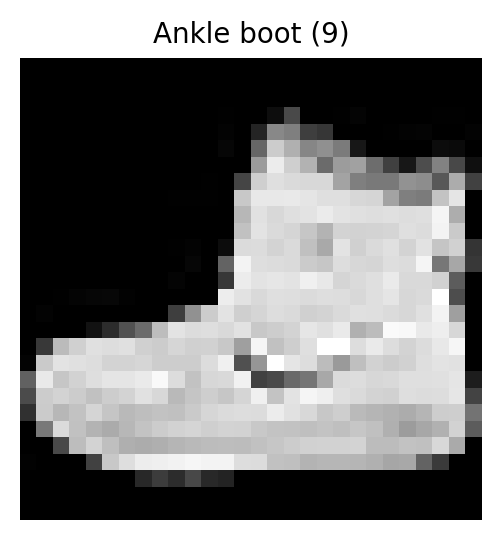

In [13]:
# 주피터노트북에서 그림 선명하게
%config InlineBackend.figure_format = 'retina'

# 첫 데이터 시각화
import matplotlib.pyplot as plt

img, idx = x_train[0], y_train[0] # 이미지와 정답 저장
plt.figure(figsize=(4, 3)) # 그림 크기 설정
plt.imshow(img, cmap='gray')  # 흑백(cmap='gray') 이미지 출력
plt.title(f"{class_names[idx]} ({idx})", fontsize=10)  # 제목: 클래스 이름 + 레이블 번호
plt.axis('off')  # x/y 축 안 보이게 설정
plt.show();

### Min-Max Normalization Formula

Min-Max 정규화는 다음과 같은 수식으로 표현됩니다:

$$
x_{\text{norm}} = \frac{x - \min(x)}{\max(x) - \min(x)}
$$

- $x$: 원본 데이터 값  
- $\min(x)$: 해당 피처의 최소값  
- $\max(x)$: 해당 피처의 최대값  
- $x_{\text{norm}}$: 정규화된 값 (0~1)

In [16]:
# 데이터 정규화
# 픽셀 값을 0~255 정수에서 0~1 실수로 정규화 (모델 성능 향상)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [17]:
print(x_train.min(), x_train.max())

0.0 1.0


In [18]:
# CNN 입력 형식에 맞게 채널 차원 추가: (28, 28) → (28, 28, 1)
x_train = x_train[..., np.newaxis]  # shape: (60000, 28, 28, 1)
x_test = x_test[..., np.newaxis]    # shape: (10000, 28, 28, 1)
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [19]:
!pip show koreanize-matplotlib

In [ ]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 82.6 MB/s eta 0:00:00


### Fashion-MNIST에서 10개의 클래스 이미지 시각화(그리기)

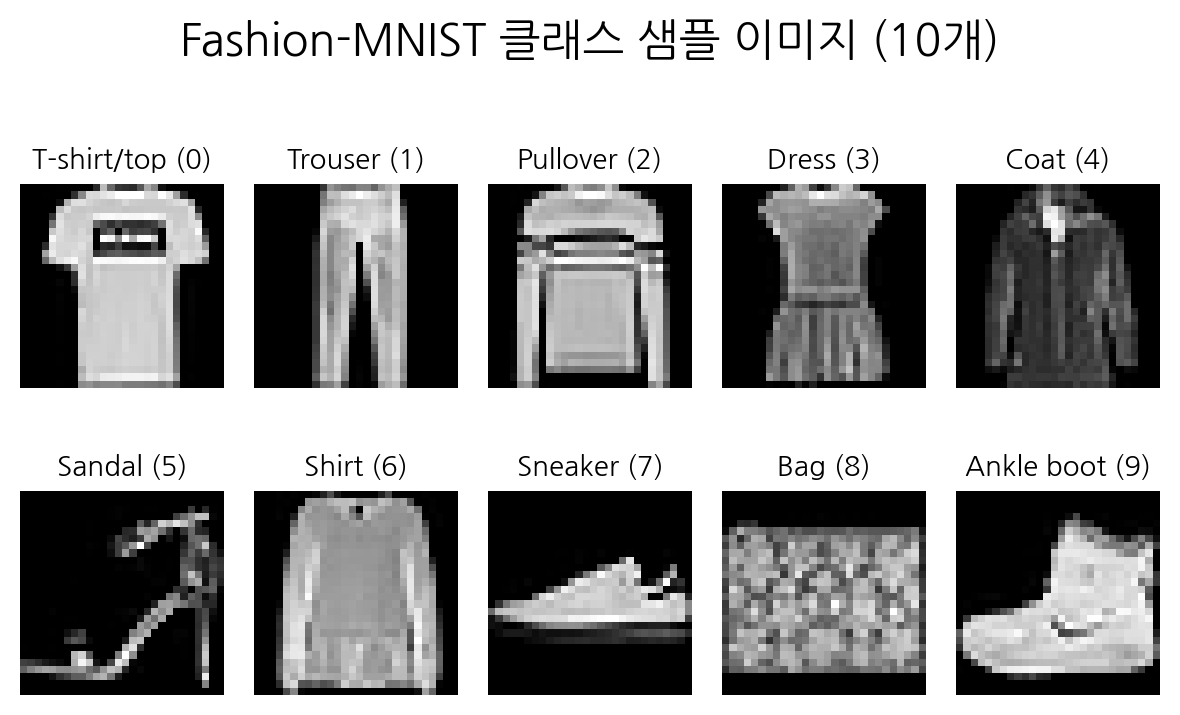

In [ ]:
# 필요한 라이브러리 임포트
import tensorflow as tf            # TensorFlow: 딥러닝 프레임워크
import matplotlib.pyplot as plt    # matplotlib: 이미지 시각화 라이브러리
# import numpy as np                # numpy: 수치 계산을 위한 라이브러리

# Fashion-MNIST 데이터셋 로드
# 학습용 이미지와 라벨만 사용 (테스트 데이터는 무시)
(train_images, train_labels), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

# 각 클래스 번호(0~9)에 대응하는 이름 정의
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 각 클래스별로 첫 번째로 등장하는 이미지를 저장할 리스트 (10개)
class_images = [None] * 10  # 인덱스 0~9에 해당하는 이미지가 들어갈 예정
found_classes = set()       # 이미 저장한 클래스 번호 추적용 집합

# 학습 이미지와 라벨을 한 쌍씩 반복하며 이미지 수집
for img, label in zip(train_images, train_labels):
    # 해당 라벨을 아직 저장하지 않았다면
    if label not in found_classes:
        class_images[label] = img         # 해당 라벨의 이미지를 저장
        found_classes.add(label)          # 라벨 번호를 집합에 추가

    # 모든 10개 클래스의 이미지가 수집되면 반복 종료
    if len(found_classes) == 10:
        break

# 시각화를 위한 그림과 축 객체 생성 (2행 5열)
fig, axes = plt.subplots(2, 5, figsize=(6, 4))  # 전체 크기 설정

# 저장된 10개 이미지를 순서대로 시각화
for idx, image in enumerate(class_images):
    row = idx // 5     # 행 번호: 0 또는 1
    col = idx % 5      # 열 번호: 0~4
    ax = axes[row, col]  # 해당 위치의 subplot 선택

    ax.imshow(image, cmap='gray')  # 흑백(cmap='gray') 이미지 출력
    ax.set_title(f"{class_names[idx]} ({idx})", fontsize=10)  # 제목: 클래스 이름 + 레이블 번호
    ax.axis('off')  # x/y 축 안 보이게 설정

plt.suptitle("Fashion-MNIST 클래스 샘플 이미지 (10개)", fontsize=16)
# 레이아웃 자동 정리 (겹치지 않게)
plt.tight_layout()
plt.show()  # 화면에 그림 출력

## 종료